# Customer Churn Analysis
#### Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base

### Importing Libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Ensemble techniques
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Model selection and model accuracy metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import cross_val_score,GridSearchCV


### Uploading dataset

In [2]:
df = pd.read_csv("Customer_churn")
pd.set_option("display.max_columns",None)
# Reading top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Checking the last rows
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
# checking the rows and columns of dataset
print("Dataset contains {} rows and {} columns.".format(len(df),len(df.columns)))

Dataset contains 7043 rows and 21 columns.


In [5]:
# checking the columns
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Let's check the data type
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

We can see that most of the data is in categorical form.

In [7]:
# Let's check full information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


So our dataset of `7043` rows and `21` columns is composed of datatypes :-
* float type - 1
* Integer type - 2
* Object type - 18

In [8]:
# Checking null values

if df.isnull().sum().any()==True:
    print("Null values present in dataset")
else:
    print("There is no null values in dataset")

There is no null values in dataset


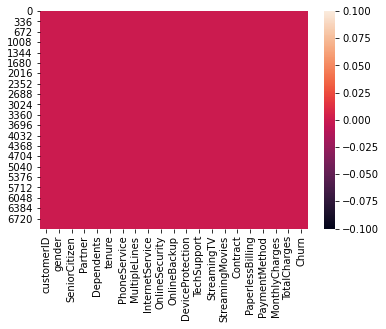

In [9]:
# checking heatmap for null values
sns.heatmap(df.isnull())

###### So there is no null values in our dataset.

In [10]:
# Let's check the duplicate values in data
if df.duplicated().sum().any()==True:
    print("Our data contains duplicate values")
else:
    print("There are no duplicate values in our data")

There are no duplicate values in our data


In [11]:
# Let's check features description
df.describe()    

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### Key Observations :-
So we have only `3` numerical features which are giving us some information -
* Seniorcitizen is a integer type of data,it suggest only two values 0 and 1.So it is not giving any usefull information although it can specify that there is imbalance in the data of SeniorCitizen.
* Tenure is also a integer type of data ,it suggest the tenure(years) of a customer in a company, there is also a difference in mean and median of tenure data.
* Monthlychareges is the only float datatype in our dataset,difference in mean and median is suggesting the presence of skewness in dataset,while difference in 75th and 100th percentile is suggesting the persencee of outliers.

In [12]:
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [13]:
# CustomerId is not important for us so we are dropping it
df.drop(columns=['customerID'],axis=1,inplace=True)

In [14]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Percentage of No data - 73.46
Percentage of Yes data - 26.54


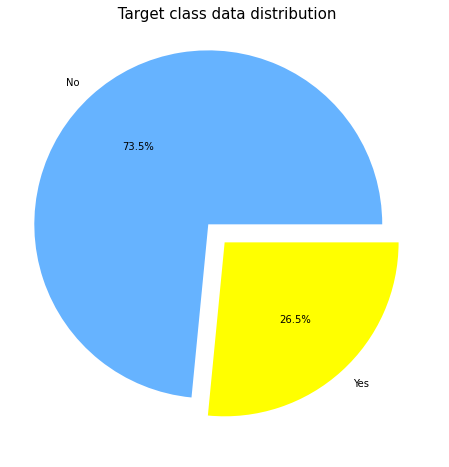

In [15]:
# Checking whether the data is balanced or not
print("Percentage of No data -",round((len(df[df['Churn']=='No'])/len(df['Churn']))*100,2))
print("Percentage of Yes data -",round((len(df[df['Churn']=='Yes'])/len(df['Churn']))*100,2))

plt.figure(figsize=(12,8))
plt.pie([len(df[df['Churn']=="No"]),len(df[df['Churn']=="Yes"])],labels=["No","Yes"], autopct='%2.1f%%', colors = ['#66b3ff','yellow'],explode=(0.14,0))
plt.title(" Target class data distribution",fontsize=15)
plt.show()

###### our dataset is slightly imbalanced but there is no need to treat imbalance here.

In [16]:
categorical_data=df.select_dtypes(exclude=[np.number])
categorical_data
for i in categorical_data:
    print(i,"Unique values are- \n",categorical_data[i].unique())
    print()

gender Unique values are- 
 ['Female' 'Male']

Partner Unique values are- 
 ['Yes' 'No']

Dependents Unique values are- 
 ['No' 'Yes']

PhoneService Unique values are- 
 ['No' 'Yes']

MultipleLines Unique values are- 
 ['No phone service' 'No' 'Yes']

InternetService Unique values are- 
 ['DSL' 'Fiber optic' 'No']

OnlineSecurity Unique values are- 
 ['No' 'Yes' 'No internet service']

OnlineBackup Unique values are- 
 ['Yes' 'No' 'No internet service']

DeviceProtection Unique values are- 
 ['No' 'Yes' 'No internet service']

TechSupport Unique values are- 
 ['No' 'Yes' 'No internet service']

StreamingTV Unique values are- 
 ['No' 'Yes' 'No internet service']

StreamingMovies Unique values are- 
 ['No' 'Yes' 'No internet service']

Contract Unique values are- 
 ['Month-to-month' 'One year' 'Two year']

PaperlessBilling Unique values are- 
 ['Yes' 'No']

PaymentMethod Unique values are- 
 ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Total

###### Some of the columns contains No internet services which is not a different class ,as the feature is based on Yes and No so we are going to replace No internet services wiith only No value.
###### And also the TotalCharges columns contians the data which is of float type but stated as object,there is need to format the datatype of TotalChareges.

In [17]:
# Cleaning the classes of features
df['MultipleLines'].replace({'No phone service':'No'},inplace=True)
print("MultipleLines -",df['MultipleLines'].unique())
      
df['OnlineSecurity'].replace({'No internet service':'No'},inplace=True)
print("OnlineSecurity -",df['OnlineSecurity'].unique())
      
df['OnlineBackup'].replace({'No internet service':'No'},inplace=True)
print("OnlineBackup -",df['OnlineBackup'].unique())
      
df['DeviceProtection'].replace({'No internet service':'No'},inplace=True)
print("DeviceProtection -",df['DeviceProtection'].unique())
      
      
df['TechSupport'].replace({'No internet service':'No'},inplace=True)
print("TechSupport -",df['TechSupport'].unique())
      
df['StreamingTV'].replace({'No internet service':'No'},inplace=True)
print("StreamingTV -",df['StreamingTV'].unique())
      
df['StreamingMovies'].replace({'No internet service':'No'},inplace=True)
print("StreamingMovies -",df['StreamingMovies'].unique())


MultipleLines - ['No' 'Yes']
OnlineSecurity - ['No' 'Yes']
OnlineBackup - ['Yes' 'No']
DeviceProtection - ['No' 'Yes']
TechSupport - ['No' 'Yes']
StreamingTV - ['No' 'Yes']
StreamingMovies - ['No' 'Yes']


In [18]:
# Setting correct data type
df=df[df['TotalCharges'] !=" "]
df['TotalCharges']=df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [19]:
# Changing seniorCitizen into categorical form
df['SeniorCitizen'].replace({0:'No',1:"Yes"},inplace=True)
df['SeniorCitizen'].value_counts()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

In [20]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [21]:
# Creating cateegorical and numerical features list
categorical_data=[]
numerical_data=[]
for i in df:
    if df[i].dtype=='object':
        categorical_data.append(i)
    else:
        numerical_data.append(i)

In [22]:
print("********Cataegorical data********\n",categorical_data,"\n\n*********Numerical data*********\n",numerical_data)

********Cataegorical data********
 ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 

*********Numerical data*********
 ['tenure', 'MonthlyCharges', 'TotalCharges']


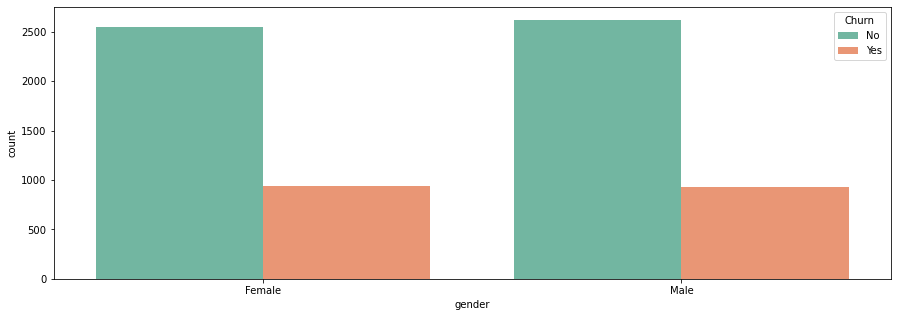

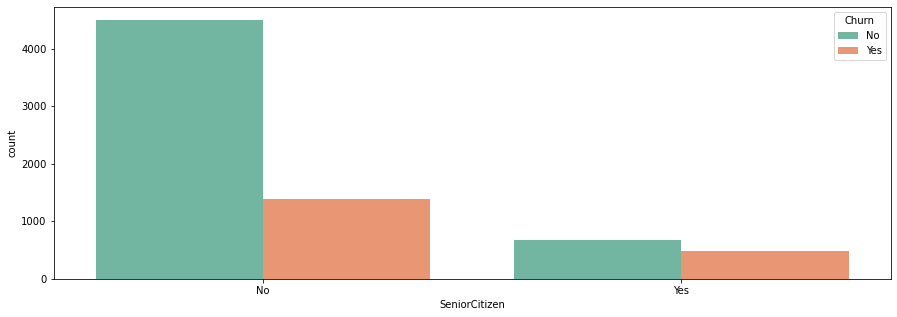

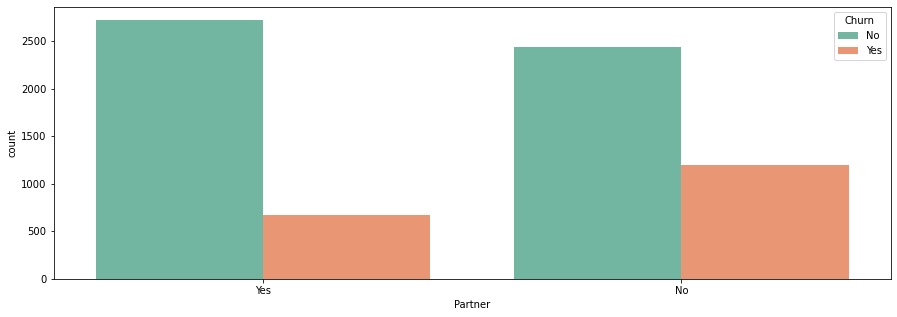

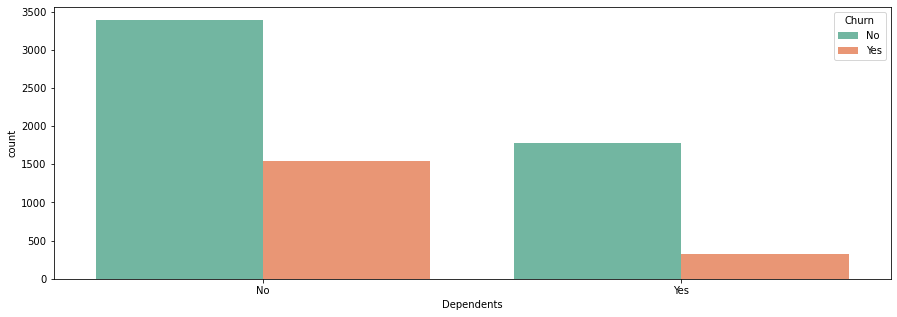

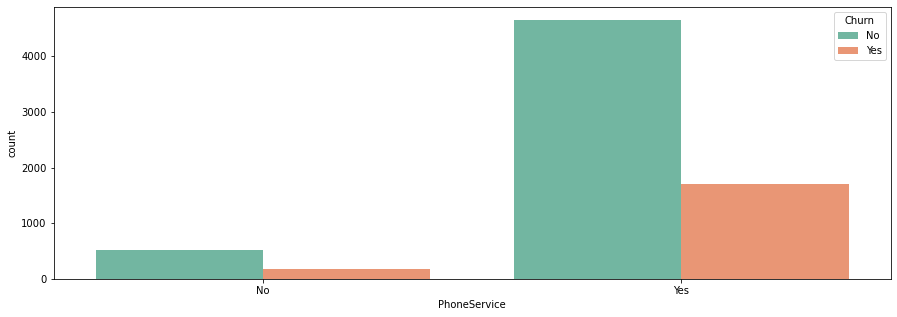

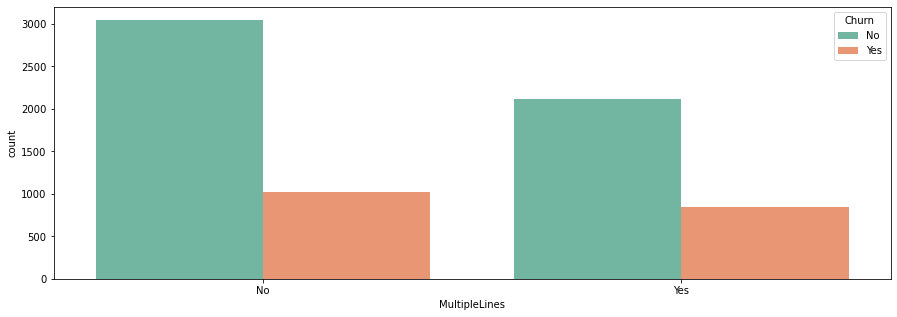

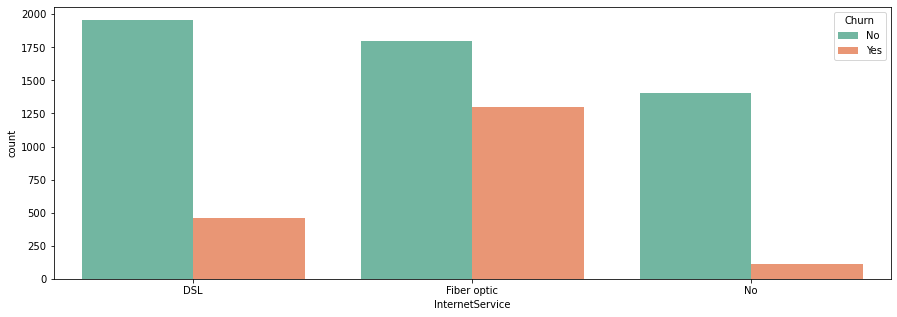

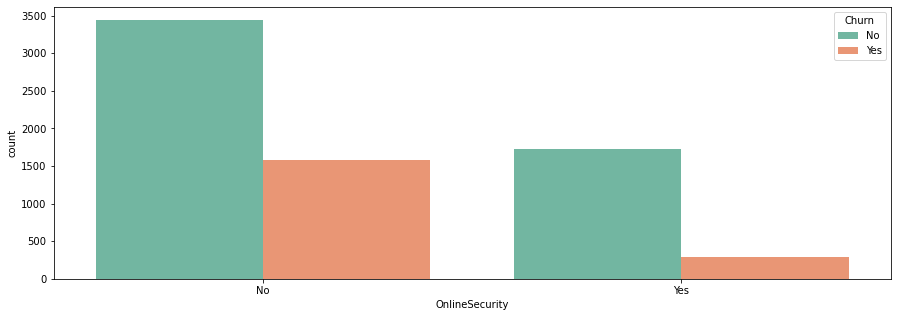

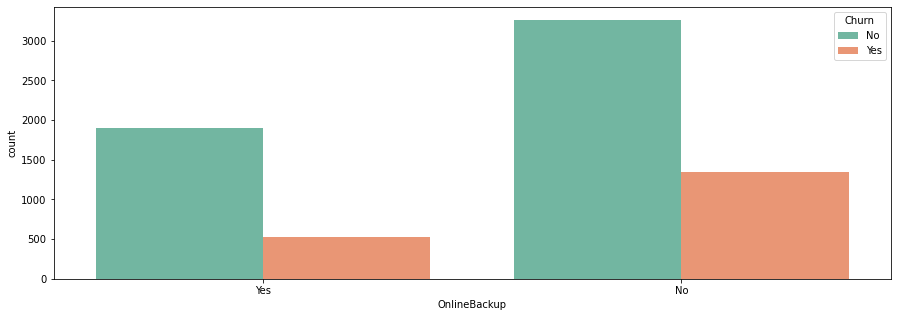

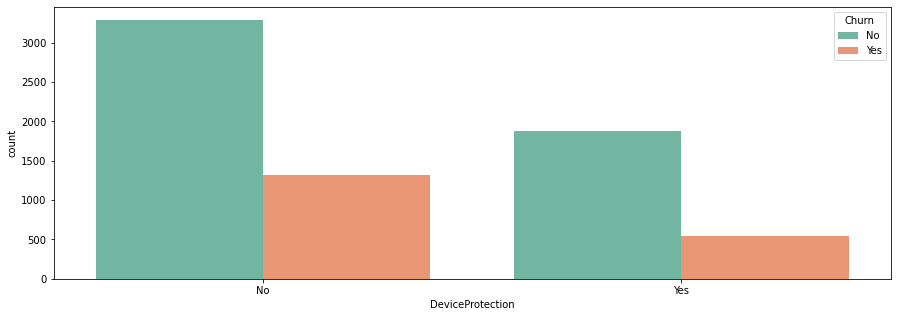

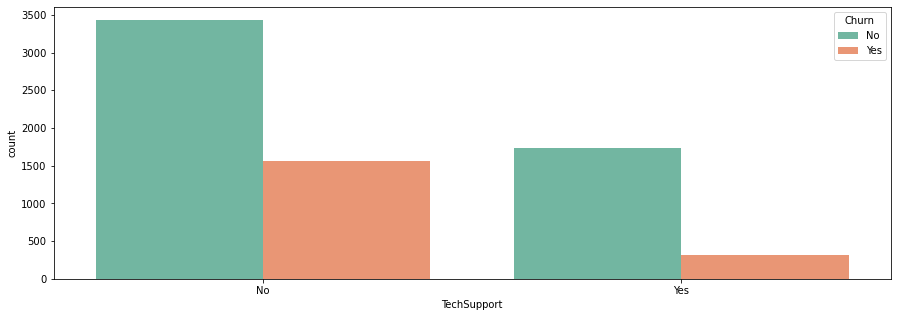

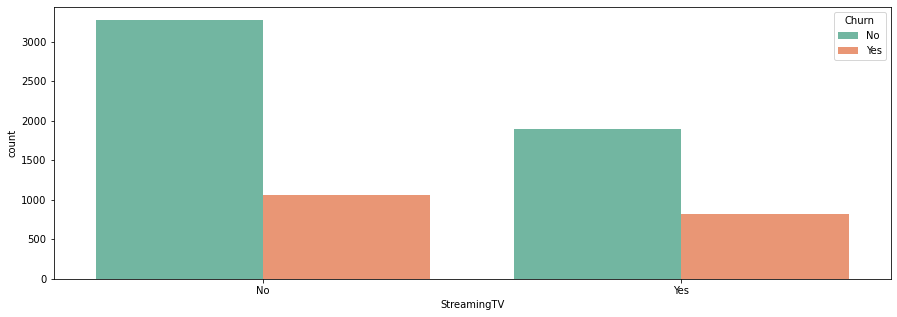

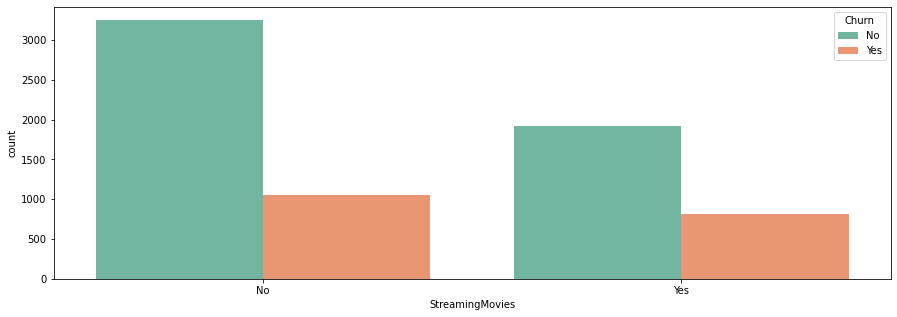

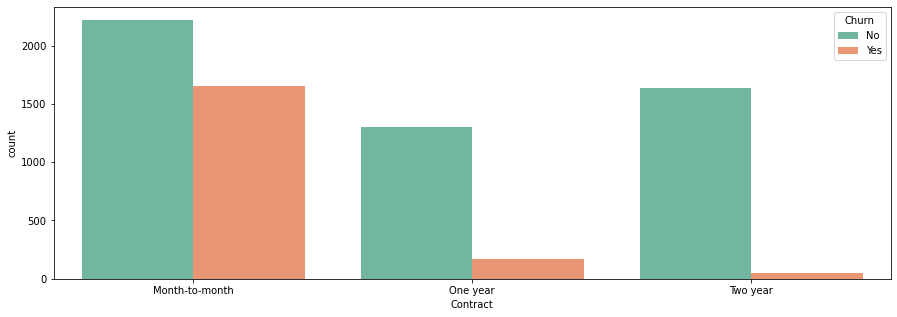

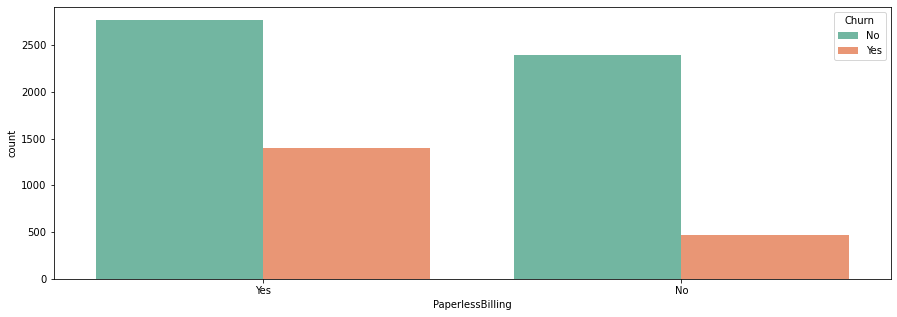

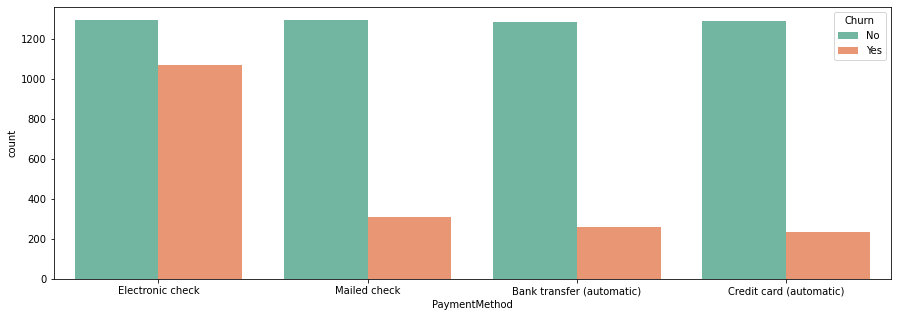

In [23]:
for i in [x for x in df.columns if x not in numerical_data + ['Churn']]:
    plt.figure(figsize=(15,5))
    sns.countplot(df[i],palette='Set2',hue='Churn',data=df)

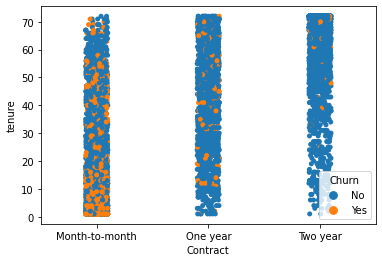

In [24]:
sns.stripplot(x="Contract",y="tenure",hue='Churn',data=df)

###### Month-to-month subscription has more churn than long term contract.

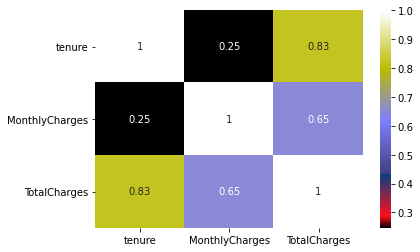

In [25]:
sns.heatmap(df.corr(),cmap='gist_stern',annot=True)

#### Key Observations :-
* From the correlation graph we can say that tenure and totalCharges are highly correlated. It is natural conditon as more the tenure more will be the charges. But the relation between these 2 features aslo leads to multicollinearity.
* Also the MonthlyCharges is having positive correlation with TotalCharges.It will also create multicollinearity.

Skewness of tenure = 0.24
Skewness of MonthlyCharges = -0.22
Skewness of TotalCharges = 0.96


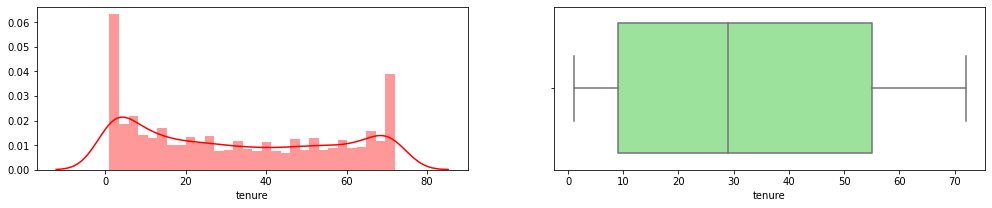

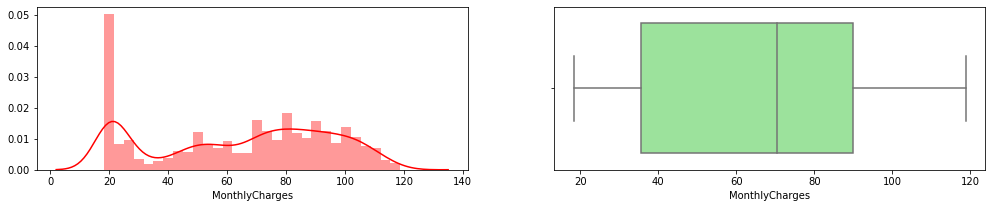

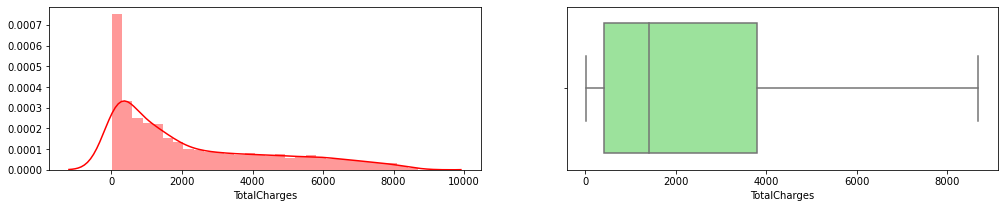

In [26]:
#Univariate analysis of numerical features
for i in ['tenure', 'MonthlyCharges','TotalCharges']:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30,color='red')
    f.add_subplot(1,2,2)
    sns.boxplot(df[i],color='lightgreen')
    print('Skewness of %s = %0.2f' %(i, df[i].skew()))

###### There is skewness in TotalCharges.

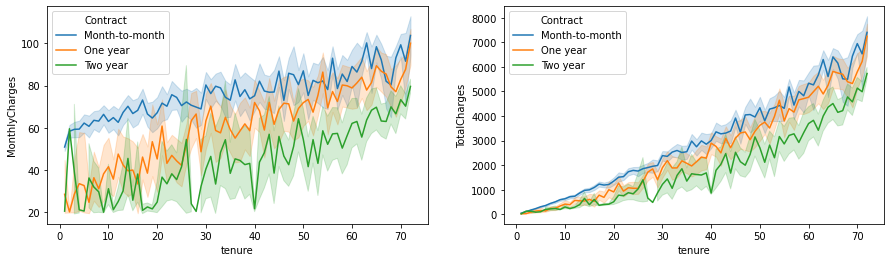

In [28]:
f=plt.figure(figsize=(15,4))
f.add_subplot(1,2,1)
sns.lineplot(x='tenure',y="MonthlyCharges",hue='Contract',data=df)
f.add_subplot(1,2,2)
sns.lineplot(x='tenure',y="TotalCharges",hue='Contract',data=df)

###### Month-to-month charges are high as compared to more time contract. Longer the contract period less will be the  charges.

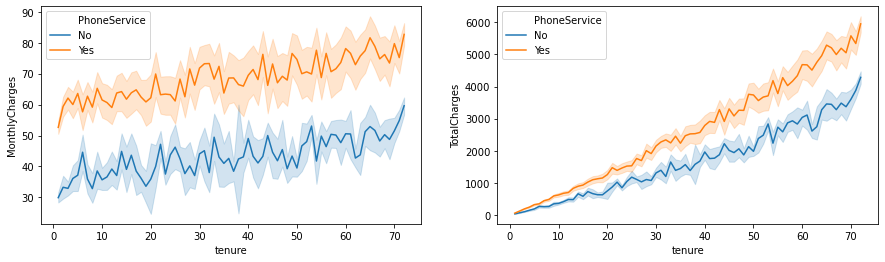

In [29]:
f=plt.figure(figsize=(15,4))
f.add_subplot(1,2,1)
sns.lineplot(x='tenure',y="MonthlyCharges",hue='PhoneService',data=df)
f.add_subplot(1,2,2)
sns.lineplot(x='tenure',y="TotalCharges",hue='PhoneService',data=df)

###### Different type of internet services have different charges ,Fibre-optic type is the most expensive internetservice.

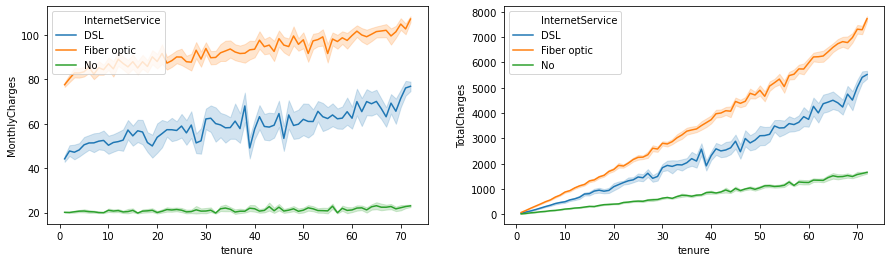

In [30]:
f=plt.figure(figsize=(15,4))
f.add_subplot(1,2,1)
sns.lineplot(x='tenure',y="MonthlyCharges",hue='InternetService',data=df)
f.add_subplot(1,2,2)
sns.lineplot(x='tenure',y="TotalCharges",hue='InternetService',data=df)

###### Including the phone services will increase the charges.

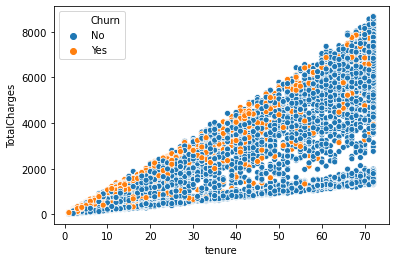

In [32]:
sns.scatterplot(x='tenure',y="TotalCharges",data=df,hue='Churn')

### Encoding data

In [35]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=encoder.fit_transform(df[i])

In [36]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


### Splitting dependent and independent features


In [37]:
x=df.drop(['Churn','TotalCharges'],axis=1)
y=df['Churn']

In [38]:
print("Independent variabales shape - ",x.shape)
print("Dependent variables shape - ",y.shape)

Independent variabales shape -  (7032, 18)
Dependent variables shape -  (7032,)


In [39]:
features=x.columns

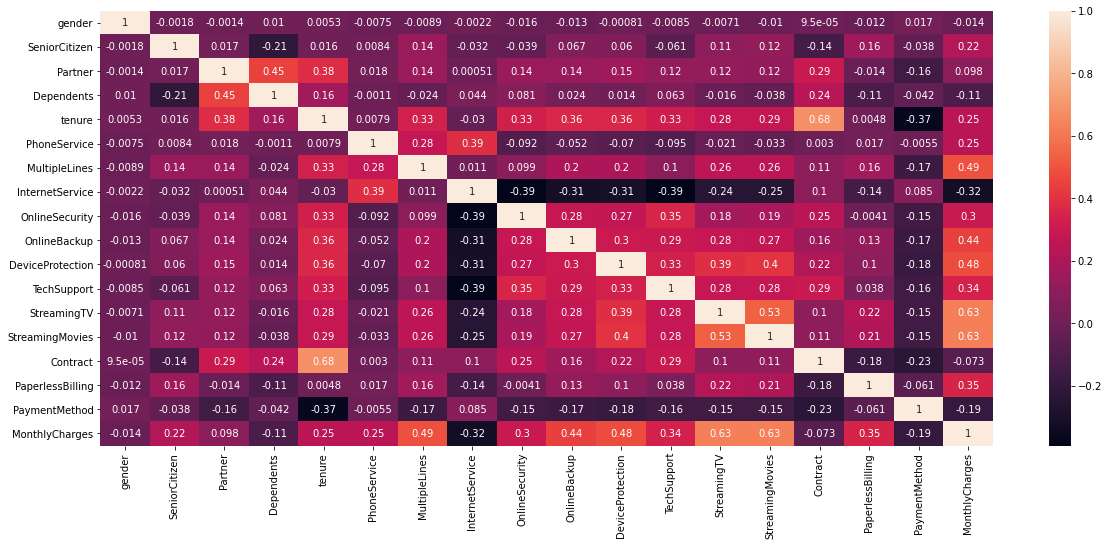

In [40]:
plt.figure(figsize=(20,8))
sns.heatmap(x.corr(),annot=True)

##### Some columns are having multicollinarity like tenure and contract,streamingTV and MonthlyCharges.

### Splitting into training and testing dataset

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [42]:
print(),print("~~~~~~~~~~~~~~~ **** Dimensions **** ~~~~~~~~~~~~~~~")
print("Training - ",X_train.shape,Y_train.shape)
print("Testing - ",X_test.shape,Y_test.shape)


~~~~~~~~~~~~~~~ **** Dimensions **** ~~~~~~~~~~~~~~~
Training -  (5274, 18) (5274,)
Testing -  (1758, 18) (1758,)


In [43]:
# Scaling
from sklearn.preprocessing import StandardScaler
scale =StandardScaler()
X=scale.fit_transform(x)
x=pd.DataFrame(X,columns=features)

In [64]:
# function for checking best random state
def max_acc_score(clf,x,y):
    max_acc=0
    for r_state in range(42,101):
        X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=42)
        clf.fit(X_train,Y_train)
        pred=clf.predict(X_test)
        acc_s=accuracy_score(Y_test,pred)
        if acc_s>max_acc:
            max_acc=acc_s
            final_r_state=r_state
    print("The maximum r2 score", max_acc, "is achieved at r_state", final_r_state)
    return final_r_state

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Using GridSearchCV to select best parameter for the models
kn=KNeighborsClassifier()
parameters={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]}
gdk=GridSearchCV(kn,parameters)
gdk.fit(X_train,Y_train)
gdk.best_params_

{'n_neighbors': 10}

In [47]:
# Using GridSearchCV 
dt=DecisionTreeClassifier()
parameters={'criterion':('ginni','entropy')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(X_train,Y_train)
gdd.best_params_

{'criterion': 'entropy'}

In [49]:
# Using GridSearchCV 
rf=RandomForestClassifier()
parameters={'n_estimators':(50,100,200)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(X_train,Y_train)
gdrf.best_params_

{'n_estimators': 100}

In [50]:
# Using GridSearchCV 
gb=GradientBoostingClassifier()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(X_train,Y_train)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [53]:
# Using GridSearchCV 
ad=AdaBoostClassifier()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(X_train,Y_train)
gad.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [52]:
# Using GridSearchCV 
sv=SVC()
parameters={'kernel':['linear','sigmoid','poly','rbf'], 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(X_train,Y_train)
gdsr.best_params_

{'C': 10, 'kernel': 'linear'}

In [54]:
LR=LogisticRegression()
sv=SVC(C=10,kernel='linear')
dt=DecisionTreeClassifier(criterion='entropy')
kn=KNeighborsClassifier(n_neighbors = 10)
gnb=GaussianNB()
rf=RandomForestClassifier(n_estimators = 100)
ad=AdaBoostClassifier(learning_rate= 0.1, n_estimators= 500)
gb=GradientBoostingClassifier(learning_rate=0.1, n_estimators= 50)

In [55]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('SVC',sv))
models.append(('DecisionTreeClassifier',dt))
models.append(('KNeighborsClassifier',kn))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rf))
models.append(('AdaBoostclassifier',ad))
models.append(('GradientBoostingclassifier',gb))

In [58]:
Model=[]
score=[]
acc=[]
cv_score=[]
roc_score=[]
for name,model in models:
    print("~~~~~~~~******~~~~~~~~~~~",name,"~~~~~~~~~~******~~~~~~~~~~~~")
    
    Model.append(name)
    print("\n")
    model.fit(X_train,Y_train)
    print(model)
    sc=model.score(X_train,Y_train)
    print("Training score is -> ",sc*100)
    score.append(sc*100)
    pred=model.predict(X_test)
    acc_score=accuracy_score(Y_test,pred)
    print("Accuracy is -> ",acc_score*100)
    acc.append(acc_score*100)
    soc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print("Cross validation score -> ",soc*100)
    cv_score.append(soc*100)
    print(confusion_matrix(Y_test,pred))
    print(classification_report(Y_test,pred))
   
    fpr,tpr,threshold=roc_curve(Y_test,pred)
    roc_auc=auc(fpr,tpr)
    print("ROC_AUC score -> ,",roc_auc*100)
    roc_score.append(roc_auc*100)
    print()

~~~~~~~~******~~~~~~~~~~~ LogisticRegression ~~~~~~~~~~******~~~~~~~~~~~~


LogisticRegression()
Training score is ->  80.47023132347364
Accuracy is ->  79.46530147895335
Cross validation score ->  80.33255789736543
[[1162  138]
 [ 223  235]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1300
           1       0.63      0.51      0.57       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.72      1758
weighted avg       0.78      0.79      0.79      1758

ROC_AUC score -> , 70.34732952636884

~~~~~~~~******~~~~~~~~~~~ SVC ~~~~~~~~~~******~~~~~~~~~~~~


SVC(C=10, kernel='linear')
Training score is ->  80.2047781569966
Accuracy is ->  79.35153583617748
Cross validation score ->  80.00535829286811
[[1157  143]
 [ 220  238]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1300
           1       0.62      0.52      0.57       

In [59]:
result = pd.DataFrame({'Model':Model,'Score':score,'Accuracy_score':acc,'cross_val_score':cv_score,'Roc_auc_curve':roc_score})
result

,Model,Score,Accuracy_score,cross_val_score,Roc_auc_curve
0,LogisticRegression,80.470231,79.465301,80.332558,70.347330
1,SVC,80.204778,79.351536,80.005358,70.482533
2,DecisionTreeClassifier,99.791430,71.387941,72.482972,63.966577
3,KNeighborsClassifier,82.214638,77.872582,77.104581,65.947094
4,GaussianNB,76.147137,75.199090,75.981007,73.543668
5,RandomForestClassifier,99.791430,77.531286,78.583510,67.696171
6,AdaBoostclassifier,81.001138,78.782708,80.417886,69.744374
7,GradientBoostingclassifier,81.494122,78.782708,80.247250,68.259489


##### Using all necessary algorithms we find that LogisticRegression and SupportVectorClassifier are giving better results than others,as they are better in all forms of metrics.  Logistic Regression is giving better results than SVC as the classification report and confusion matrix is also better than SVC . So we are using Logistic Regression.

In [65]:
# best random state
max_acc_score(LR,x,y)

The maximum r2 score 0.7940841865756542 is achieved at r_state 42


42

In [67]:
# Using best random state
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.25,random_state=42)
LR=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LR.fit(X_train,Y_train)
pred=LR.predict(X_test)
acc=accuracy_score(Y_test,pred)
cv=cross_val_score(LR,x,y,cv=5,scoring='accuracy').mean()
print("Accuracy score is", acc)
print("Cross val score is", cv)

Accuracy score is 0.7940841865756542
Cross val score is 0.8033255789736543


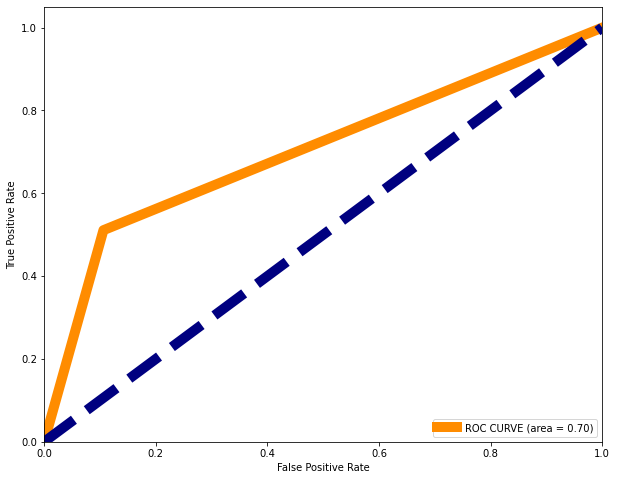

In [68]:
fpr,tpr,thresholds=roc_curve(Y_test,pred)
roc_auc =auc(fpr,tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='darkorange',lw=10,label="ROC CURVE (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### Saving model

In [69]:
import joblib
filename="auto_insaurance.obj"
joblib.dump(LR,filename)

['auto_insaurance.obj']

In [70]:
# Loading model
model=joblib.load(filename)
model

LogisticRegression()

### Conclusion

In [71]:
conclusion=pd.DataFrame([model.predict(X_test),Y_test],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021